In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- 1. Load Data ---
file_path = 'data/creditcard.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found in 'ai-model/data/'")

# --- 2. Preprocessing (Scaling) ---
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
print("Data scaled successfully.")

# --- 3. Split Data (X and y) ---
X = df.drop('Class', axis=1)
y = df['Class']

# --- 4. Create Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training and test sets created.")
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")

Dataset loaded successfully.
Data scaled successfully.
Training and test sets created.
X_train shape: (227845, 30) | X_test shape: (56962, 30)


In [3]:
# --- Step 6: Train a Baseline Model (Logistic Regression) ---
lr_model = LogisticRegression(random_state=42, max_iter=1000)
print("Training Logistic Regression model...")
lr_model.fit(X_train, y_train)
print("Model training complete.")

y_pred = lr_model.predict(X_test)
print("Predictions made on test data.")

Training Logistic Regression model...
Model training complete.
Predictions made on test data.



--- Classification Report (Logistic Regression) ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.83      0.64      0.72        98

      accuracy                           1.00     56962
     macro avg       0.91      0.82      0.86     56962
  weighted avg       1.00      1.00      1.00     56962


--- Confusion Matrix (Logistic Regression) ---


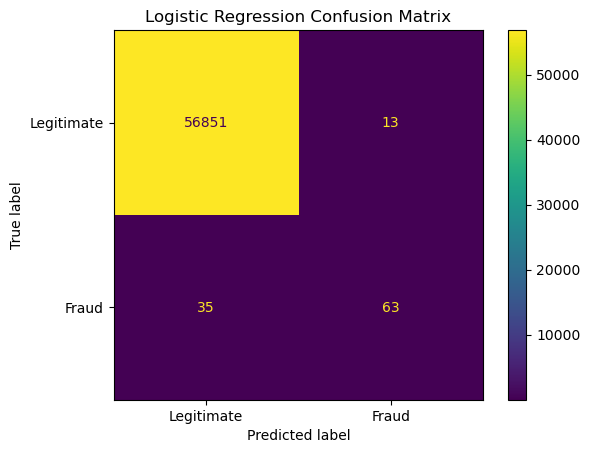

In [4]:
# --- Step 7: Evaluate the Baseline Model ---
print("\n--- Classification Report (Logistic Regression) ---")
print(classification_report(y_test, y_pred, target_names=['Legitimate (0)', 'Fraud (1)']))

print("\n--- Confusion Matrix (Logistic Regression) ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Fraud'])
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest model
# n_estimators=100 means it will build 100 decision trees
# random_state=42 ensures we get a reproducible result
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) 
# n_jobs=-1 uses all your M2 Mac's CPU cores to train faster

print("Training Random Forest model...")

# 2. Train the model (This may take a minute)
rf_model.fit(X_train, y_train)

print("Model training complete.")

# 3. Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

print("Predictions made with Random Forest.")

Training Random Forest model...
Model training complete.
Predictions made with Random Forest.



--- Classification Report (Random Forest) ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.94      0.82      0.87        98

      accuracy                           1.00     56962
     macro avg       0.97      0.91      0.94     56962
  weighted avg       1.00      1.00      1.00     56962


--- Confusion Matrix (Random Forest) ---


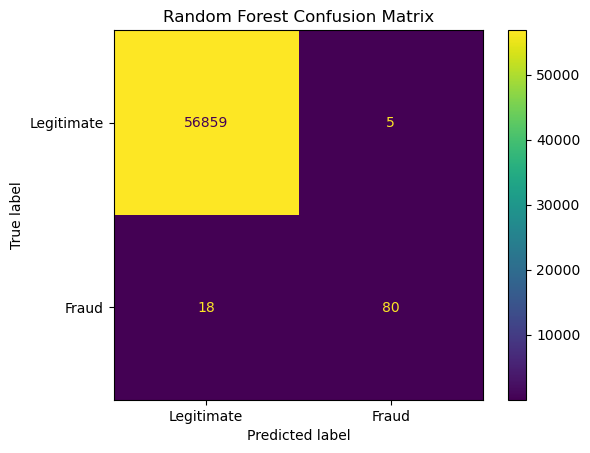

In [10]:
# 1. Print the Classification Report
print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, target_names=['Legitimate (0)', 'Fraud (1)']))

# 2. Generate and Display the Confusion Matrix
print("\n--- Confusion Matrix (Random Forest) ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Legitimate', 'Fraud'])
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [11]:
import joblib

# 1. Define the model we want to save
model_to_save = rf_model

# 2. Define the path where we will save it
# This saves it in the 'saved_model' folder we created.
save_path = "saved_model/fraud_model.joblib"

# 3. Save the model to the file
joblib.dump(model_to_save, save_path)

print(f"Model successfully saved to: {save_path}")

Model successfully saved to: saved_model/fraud_model.joblib


In [12]:
# --- Step 11: Save the Data Scalers ---
# We need to save the scalers so the API can use them
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

print("Loading raw data to fit scalers...")
# 1. Load the raw data again
df_raw = pd.read_csv('data/creditcard.csv')

# 2. Fit and save the 'Amount' scaler
amount_scaler = StandardScaler()
amount_scaler.fit(df_raw['Amount'].values.reshape(-1, 1))
joblib.dump(amount_scaler, 'saved_model/amount_scaler.joblib')
print("Amount scaler saved to 'saved_model/amount_scaler.joblib'")

# 3. Fit and save the 'Time' scaler
time_scaler = StandardScaler()
time_scaler.fit(df_raw['Time'].values.reshape(-1, 1))
joblib.dump(time_scaler, 'saved_model/time_scaler.joblib')
print("Time scaler saved to 'saved_model/time_scaler.joblib'")

print("Scalers saved successfully.")

Loading raw data to fit scalers...
Amount scaler saved to 'saved_model/amount_scaler.joblib'
Time scaler saved to 'saved_model/time_scaler.joblib'
Scalers saved successfully.


In [13]:
import joblib
import pandas as pd
import numpy as np

print("--- TEST: Loading model and scalers from disk... ---")
try:
    model = joblib.load("saved_model/fraud_model.joblib")
    amount_scaler = joblib.load("saved_model/amount_scaler.joblib")
    time_scaler = joblib.load("saved_model/time_scaler.joblib")
    print("All files loaded successfully.")
except FileNotFoundError:
    print("ERROR: Could not find model or scaler files. Make sure they are in 'ai-model/saved_model/'")


# This is the *exact* column order from your API
FEATURE_ORDER = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]

# This is the *exact* fraud data from your frontend
fraud_data_dict = {
  "Time": 80746.0,
  "V1": -4.792888, "V2": -5.244270, "V3": -0.736931, "V4": -0.364061, "V5": -2.313065,
  "V6": 0.330492, "V7": 4.103090, "V8": -1.203216, "V9": -1.034731, "V10": -1.277884,
  "V11": 0.076840, "V12": 1.545808, "V13": -0.154204, "V14": 0.081169, "V15": -1.365398,
  "V16": 0.457060, "V17": -0.207242, "V18": -1.748183, "V19": -1.603708, "V20": 1.488057,
  "V21": 0.811357, "V22": 0.852928, "V23": 1.341772, "V24": -0.009212, "V25": -0.030783,
  "V26": -0.219607, "V27": -0.271815, "V28": 0.085038,
  "Amount": 900.00
}

print(f"\nOriginal Fraud Data (raw): Amount={fraud_data_dict['Amount']}, Time={fraud_data_dict['Time']}")

# --- Re-create the API's scaling logic ---
# 1. Scale 'Amount'
amount_raw = [[fraud_data_dict['Amount']]]
amount_scaled = amount_scaler.transform(amount_raw)[0][0]

# 2. Scale 'Time'
time_raw = [[fraud_data_dict['Time']]]
time_scaled = time_scaler.transform(time_raw)[0][0]

print(f"Processed Fraud Data (scaled): Amount={amount_scaled}, Time={time_scaled}")

# 3. Update the dictionary
fraud_data_dict['Amount'] = amount_scaled
fraud_data_dict['Time'] = time_scaled

# 4. Create and re-order the DataFrame
input_df = pd.DataFrame([fraud_data_dict])
input_df = input_df[FEATURE_ORDER]

print("\nDataFrame ready for model (scaled and ordered):")
print(input_df)

# --- FINAL PREDICTION ---
prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1] # Probability of class 1 (Fraud)

print("\n" + "="*30)
print("     NOTEBOOK PREDICTION     ")
print("="*30)
print(f"\nPrediction (0=Legit, 1=Fraud): {prediction}")
print(f"Fraud Probability: {probability:.4f}")

--- TEST: Loading model and scalers from disk... ---
All files loaded successfully.

Original Fraud Data (raw): Amount=900.0, Time=80746.0
Processed Fraud Data (scaled): Amount=3.2450481815773364, Time=-0.2962399139731665

DataFrame ready for model (scaled and ordered):
      Time        V1       V2        V3        V4        V5        V6  \
0 -0.29624 -4.792888 -5.24427 -0.736931 -0.364061 -2.313065  0.330492   

        V7        V8        V9  ...       V20       V21       V22       V23  \
0  4.10309 -1.203216 -1.034731  ...  1.488057  0.811357  0.852928  1.341772   

        V24       V25       V26       V27       V28    Amount  
0 -0.009212 -0.030783 -0.219607 -0.271815  0.085038  3.245048  

[1 rows x 30 columns]

     NOTEBOOK PREDICTION     

Prediction (0=Legit, 1=Fraud): 0
Fraud Probability: 0.0000


In [14]:
# --- Step 12: Get REAL Test Data for the Frontend ---
# We need to get the original, *unscaled* data to paste into our frontend.
# We can use the 'y_test' variable (which is in memory) to find the row numbers.

# 1. Load the original, unscaled dataframe
df_original = pd.read_csv('data/creditcard.csv')

# 2. Find the index for one LEGITIMATE transaction from our test set
# (We use y_test.index to get the original row number)
legit_index = y_test[y_test == 0].index[0] # Get the first legit case
legit_data = df_original.loc[legit_index]

# 3. Find the index for one FRAUDULENT transaction from our test set
fraud_index = y_test[y_test == 1].index[0] # Get the first fraud case
fraud_data = df_original.loc[fraud_index]

# --- Convert to dictionaries ---
legit_dict = legit_data.drop('Class').to_dict()
fraud_dict = fraud_data.drop('Class').to_dict()

# --- Print as JavaScript objects for easy copy/paste ---
print("="*50)
print("--- 1. REAL LEGITIMATE DATA (for page.tsx) ---")
print("="*50)
print("const defaultLegitData: TransactionPayload = {")
for key, value in legit_dict.items():
    print(f"  {key}: {value},")
print("};")

print("\n" + "="*50)
print("--- 2. REAL FRAUD DATA (for page.tsx) ---")
print("="*50)
print("const defaultFraudData: TransactionPayload = {")
for key, value in fraud_dict.items():
    print(f"  {key}: {value},")
print("};")

--- 1. REAL LEGITIMATE DATA (for page.tsx) ---
const defaultLegitData: TransactionPayload = {
  Time: 160760.0,
  V1: -0.674466064578314,
  V2: 1.40810501967799,
  V3: -1.11062205357093,
  V4: -1.32836577843066,
  V5: 1.38899603254837,
  V6: -1.30843906707795,
  V7: 1.88587890268717,
  V8: -0.614232966299775,
  V9: 0.311652212453101,
  V10: 0.65075700363522,
  V11: -0.857784661547805,
  V12: -0.229961445775592,
  V13: -0.19981700479103,
  V14: 0.266371326329879,
  V15: -0.0465441684754424,
  V16: -0.741398089749789,
  V17: -0.605616644106022,
  V18: -0.39256818789208,
  V19: -0.162648311024695,
  V20: 0.394321820843914,
  V21: 0.0800842396026648,
  V22: 0.810033595602455,
  V23: -0.224327230436412,
  V24: 0.707899237446867,
  V25: -0.13583702273753,
  V26: 0.0451021964988772,
  V27: 0.533837219064273,
  V28: 0.291319252625364,
  Amount: 23.0,
};

--- 2. REAL FRAUD DATA (for page.tsx) ---
const defaultFraudData: TransactionPayload = {
  Time: 57007.0,
  V1: -1.27124419171437,
  V2: 2.46

In [3]:
from sklearn.neural_network import MLPClassifier

# 1. Initialize the Neural Network (Multi-layer Perceptron)
# hidden_layer_sizes=(100,) means one hidden layer with 100 neurons
# verbose=True will print the training progress
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=500, # Give it more time to converge
    activation='relu',
    solver='adam',
    random_state=42,
    verbose=True
)

print("Training Neural Network (MLPClassifier)...")

# 2. Train the model (This may take a few minutes)
mlp_model.fit(X_train, y_train)

print("Neural Network training complete.")

# 3. Make predictions on the test data
y_pred_mlp = mlp_model.predict(X_test)

print("Predictions made with Neural Network.")

Training Neural Network (MLPClassifier)...
Iteration 1, loss = 0.02525638
Iteration 2, loss = 0.00333746
Iteration 3, loss = 0.00286514
Iteration 4, loss = 0.00272698
Iteration 5, loss = 0.00245624
Iteration 6, loss = 0.00242369
Iteration 7, loss = 0.00225539
Iteration 8, loss = 0.00220024
Iteration 9, loss = 0.00208477
Iteration 10, loss = 0.00202601
Iteration 11, loss = 0.00195531
Iteration 12, loss = 0.00184532
Iteration 13, loss = 0.00178124
Iteration 14, loss = 0.00183134
Iteration 15, loss = 0.00166250
Iteration 16, loss = 0.00158170
Iteration 17, loss = 0.00161415
Iteration 18, loss = 0.00157559
Iteration 19, loss = 0.00152621
Iteration 20, loss = 0.00144990
Iteration 21, loss = 0.00149050
Iteration 22, loss = 0.00135895
Iteration 23, loss = 0.00140624
Iteration 24, loss = 0.00125490
Iteration 25, loss = 0.00135190
Iteration 26, loss = 0.00120996
Iteration 27, loss = 0.00118645
Iteration 28, loss = 0.00111726
Iteration 29, loss = 0.00117610
Iteration 30, loss = 0.00114251
Iterat


--- Classification Report (Neural Network) ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.92      0.81      0.86        98

      accuracy                           1.00     56962
     macro avg       0.96      0.90      0.93     56962
  weighted avg       1.00      1.00      1.00     56962


--- Confusion Matrix (Neural Network) ---


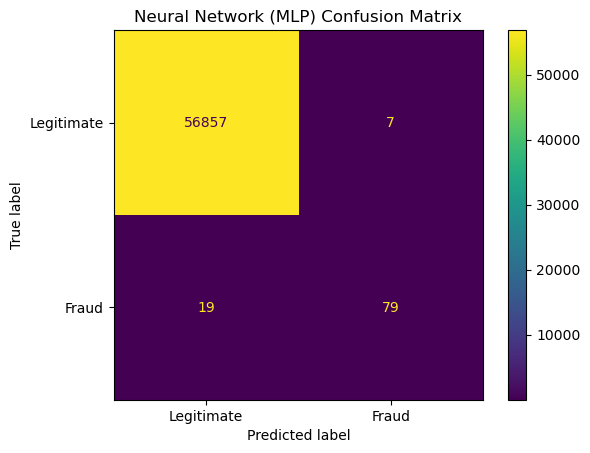

In [17]:
# 1. Print the Classification Report
print("\n--- Classification Report (Neural Network) ---")
print(classification_report(y_test, y_pred_mlp, target_names=['Legitimate (0)', 'Fraud (1)']))

# 2. Generate and Display the Confusion Matrix
print("\n--- Confusion Matrix (Neural Network) ---")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['Legitimate', 'Fraud'])
disp_mlp.plot()
plt.title("Neural Network (MLP) Confusion Matrix")
plt.show()

In [19]:
import joblib

# 1. Define the model we want to save
model_to_save = mlp_model

# 2. Define the *new* path
save_path = "saved_model/nn_model.joblib"

# 3. Save the model to the file
joblib.dump(model_to_save, save_path)

print(f"Model successfully saved to: {save_path}")

Model successfully saved to: saved_model/nn_model.joblib


In [5]:
import shap
import pandas as pd
import joblib

print("SHAP version:", shap.__version__)

# 1. Create a "background dataset" for the explainer.
# This needs to be a small, representative sample of your training data.
# 100 samples is a good, fast baseline.
background_data = shap.sample(X_train, 100)

# 2. Save this background data to a CSV file
save_path = "saved_model/background_data.csv"
background_data.to_csv(save_path, index=False)

print(f"Background data (100 samples) saved to: {save_path}")

# 3. (Optional) Test the explainer right here
print("\n--- Testing Explainer (in notebook) ---")
# Load the model we'll be explaining
rf_model_for_test = joblib.load("saved_model/fraud_model.joblib")

# Create the explainer
explainer = shap.TreeExplainer(rf_model_for_test, background_data)

# Get one fraud case from your test set to explain
X_test_fraud_sample = X_test[y_test == 1].iloc[0:1]

# Get the SHAP values (this is the core "explanation")
shap_values = explainer.shap_values(X_test_fraud_sample)

print("SHAP values calculated successfully.")
# For a binary classifier, shap_values is a list [class_0_values, class_1_values]
# We only care about class 1 (Fraud)
print("Shape of Fraud (Class 1) SHAP values:", shap_values.shape)

SHAP version: 0.48.0
Background data (100 samples) saved to: saved_model/background_data.csv

--- Testing Explainer (in notebook) ---
SHAP values calculated successfully.
Shape of Fraud (Class 1) SHAP values: (1, 30, 2)
